https://matplotlib.org/gallery/api/patch_collection.html#sphx-glr-gallery-api-patch-collection-py

In [1]:
import pandas as pd
import numpy as np
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

In [2]:
df_zipcode_geo = pd.read_csv("US_ZIP_codes.csv")

In [3]:
df_counties = df_zipcode_geo[(df_zipcode_geo['STATE']=="CA") &([len(str(item))>4 for item in df_zipcode_geo['ZIP']])]

In [4]:
df_counties_LA = df_counties[df_counties['PONAME']=='LOS ANGELES']

In [5]:
def getArrayFromGeokml(geokml):
    try:
        coord_string = geokml.strip("<Polygon><outerBoundaryIs><LinearRing><coordinates>").strip("</coordinates></LinearRing></outerBoundaryIs></Polygon>")
        coord_string.strip("<MultiGeometry>").strip("</MultiGeometry>")
        #print(coord_string)
        return np.array([[np.float(item.split(",")[0]),np.float(item.split(",")[1])] for item in coord_string.split()])
    except:
        pass

In [6]:
patches = []
for geokml in df_counties['geometry'].dropna():
    county_array = getArrayFromGeokml(geokml)
    #print(len(county_array))
    try:
        polygon = Polygon(county_array,True)
        patches.append(polygon)
    except:
        pass

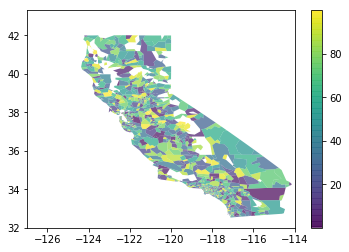

In [32]:
fig, ax = plt.subplots()
colors = 100*np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.7)
p.set_array(np.array(colors))
ax.add_collection(p)
fig.colorbar(p, ax=ax)
plt.xlim([-127,-114.0])
plt.ylim([32,43.3])
plt.show()

In [11]:
county_array.T[0]

array([-122.049915, -122.082357, -122.138444, -122.142843, -122.049915])